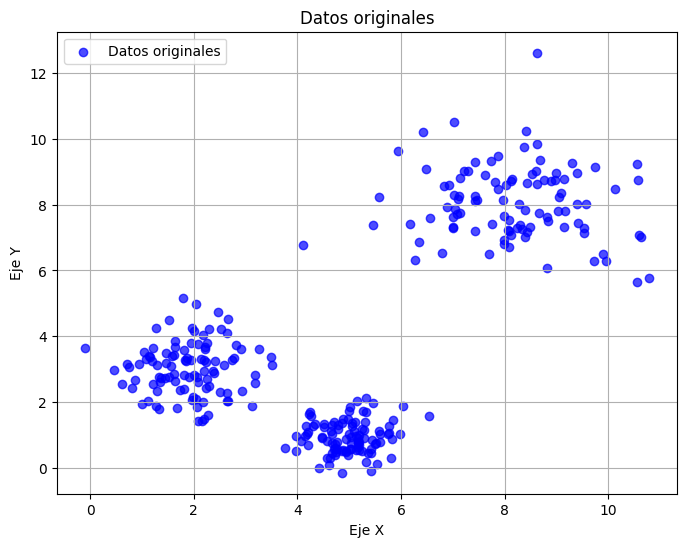

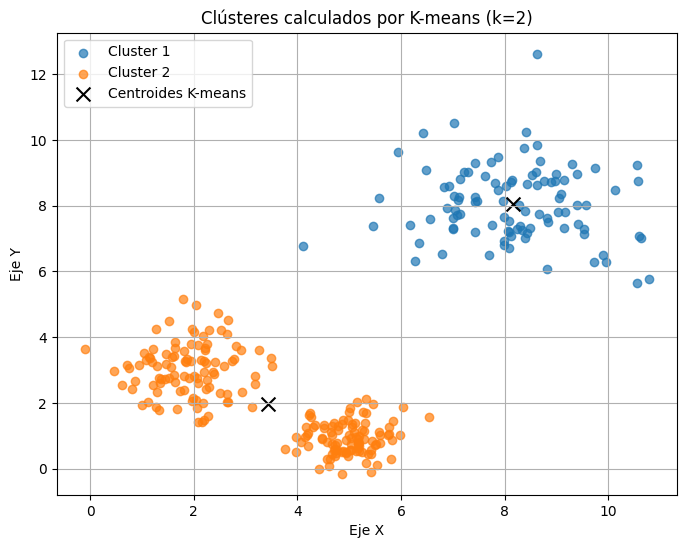

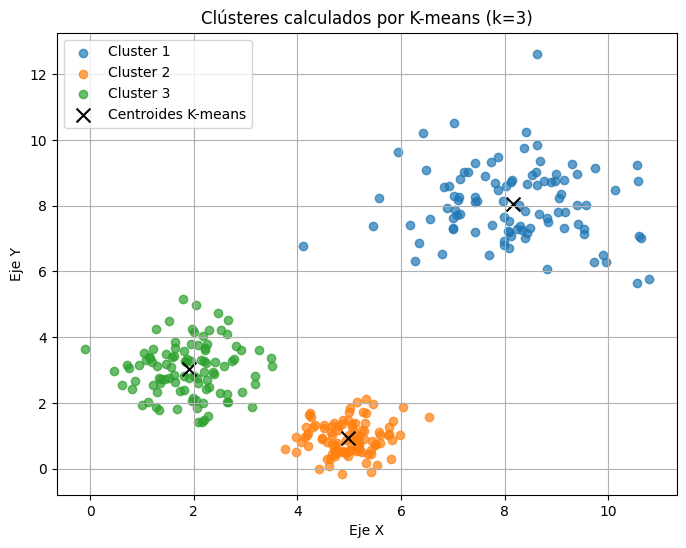

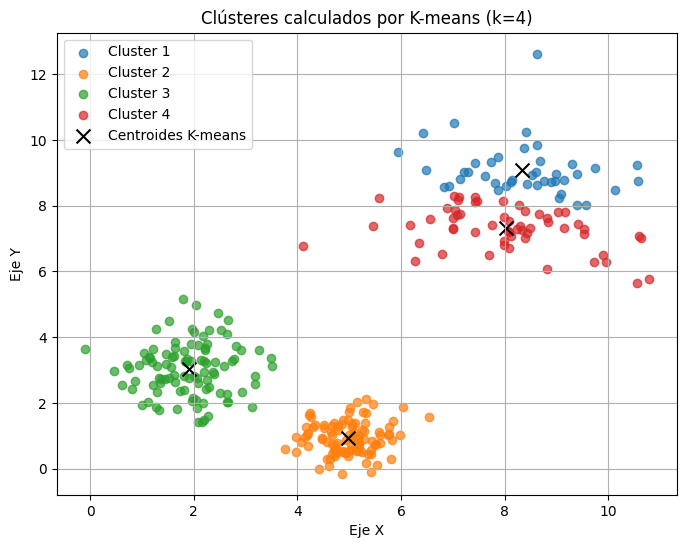

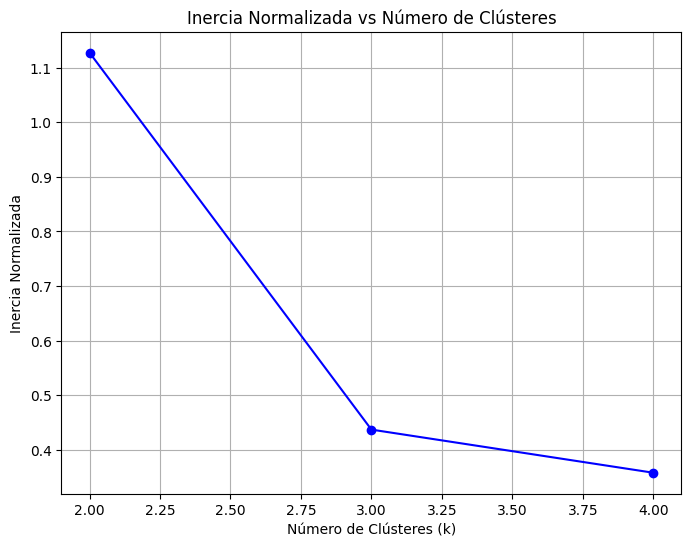

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Crear carpeta para guardar imágenes
output_dir = "cluster_images"
os.makedirs(output_dir, exist_ok=True)

# Definición de parámetros para los tres clústeres
# Posiciones de los centroides (pueden ser modificados)
centroids = [
    [2, 3],  # Centroide del primer clúster
    [8, 8],  # Centroide del segundo clúster
    [5, 1]   # Centroide del tercer clúster
]

# Ruido de cada cluster
std_devs = [0.8, 1.2, 0.5]

# Putos de cada cluster
n_points_per_cluster = 100

# Generar los datos (puntos) con random
np.random.seed(42)
cluster_1 = np.random.normal(loc=centroids[0], scale=std_devs[0], size=(n_points_per_cluster, 2))
cluster_2 = np.random.normal(loc=centroids[1], scale=std_devs[1], size=(n_points_per_cluster, 2))
cluster_3 = np.random.normal(loc=centroids[2], scale=std_devs[2], size=(n_points_per_cluster, 2))

# Crear un DataFrame con los datos para aplicar K-means posteriormente
cluster_1_df = pd.DataFrame(cluster_1, columns=['x', 'y'])
cluster_1_df['cluster'] = 1

cluster_2_df = pd.DataFrame(cluster_2, columns=['x', 'y'])
cluster_2_df['cluster'] = 2

cluster_3_df = pd.DataFrame(cluster_3, columns=['x', 'y'])
cluster_3_df['cluster'] = 3

# Concatenar todos los datos en un único DataFrame
data = pd.concat([cluster_1_df, cluster_2_df, cluster_3_df], ignore_index=True)

# Visualización de los datos originales
plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'], color="blue", label="Datos originales", alpha=0.7)
plt.title("Datos originales")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, "datos_originales.png"))
plt.show()

# Aplicar K-means con diferentes cantidades de clústeres
inercias = []
k_values = [2, 3, 4]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data[['x', 'y']])
    data[f'kmeans_cluster_k{k}'] = kmeans.labels_
    inercias.append(kmeans.inertia_/1000)  # Escalar inercia a 0-1

    # Visualización de los resultados
    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue', 'green', 'orange']
    for cluster_label in range(k):
        cluster_data = data[data[f'kmeans_cluster_k{k}'] == cluster_label]
        plt.scatter(cluster_data['x'], cluster_data['y'], label=f"Cluster {cluster_label+1}", alpha=0.7)

    # Dibujar centroides calculados por K-means
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black", marker="x", s=100, label="Centroides K-means")
    plt.title(f"Clústeres calculados por K-means (k={k})")
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f"kmeans_clusters_k{k}.png"))
    plt.show()

# Graficar la inercia
plt.figure(figsize=(8, 6))
plt.plot(k_values, inercias, marker='o', linestyle='-', color='b')
plt.title("Inercia Normalizada vs Número de Clústeres")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Inercia Normalizada")
plt.grid(True)
plt.savefig(os.path.join(output_dir, "inercia_normalizada_vs_k.png"))
plt.show()
